In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import math

## Planteamiento
Para generar estos mil datos nos resulta imposible llevar a acabo mil experimentos reales. Por ello vamos iventar estos haciendo interpolaciones sucesvivas , es decir,  para calcular el tiempo correspondiente a la longitud 1.5 metros vamos hacer la media entre los tiempos asociados a los experimentos que nos da el enunciado y en función de este  completaremos el resto de los datos.

𝘊𝘰𝘮𝘰 𝘳𝘦𝘴𝘰𝘭𝘷𝘦𝘮𝘰𝘴 𝘦𝘭 𝘱𝘳𝘰𝘣𝘭𝘦𝘮𝘢.....

Es el eje 0X de nuestra gráfica vamos a representar el dato 1/(t^2) y el 0Y repesentaremos 2L.Por lo tanto sobre esta nube de mil puntos , calcularemos la recta de regresión cuya pendiente será la gravedad del planeta en el que estamos y el coeficiente de correlación el error cometido en el cálculo de esta .

 𝘾𝙎𝙑

El csv va a contar con las siguientes columnas                                            
-L:longitud desde la que se tira la pelota

-2L:el doble la variable anterior

-t:tiempo que tarda la pelota en caer

-1/(t^2)

-g=2l*1/(t^2), es decir la graveda sera el resultadp de multiplicar la segunda columna y la cuarta

# Creando csv

In [115]:
import csv
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Interpolamos los tiempos como expliqué en el apartadp
longitudes = np.linspace(1, 2, 1000)
tiempos = []

L1, t1 = 1.00, 0.46
L2, t2 = 2.00, 0.66

for L in longitudes:
    t = t1 + (L - L1) * (t2 - t1) / (L2 - L1)
    tiempos.append(t)

dos_L = [2 * L for L in longitudes]
t_cuadrado = [t ** 2 for t in tiempos]

# Calculamos la aceleración de la gravedad utilizando la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(t_cuadrado, dos_L)
gravedad_estimada = slope

#  CSV con las columnas L, t, 2L, t^2 y g
with open("datos_interpolados.csv", "w", newline="") as csvfile:
    fieldnames = ["L", "t", "2L", "t^2", "g"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for L, t, dosL, t2 in zip(longitudes, tiempos, dos_L, t_cuadrado):
        g = 2 * L / t**2
        writer.writerow({"L": L, "t": t, "2L": dosL, "t^2": t2, "g": g})

# Cargamos el archivo CSV en un dataframe de Pandas
df = pd.read_csv('datos_interpolados.csv')




In [106]:
df

,L,t,2L,t^2,g
0,1.000000,0.460000,2.000000,0.211600,9.451796
1,1.001001,0.460200,2.002002,0.211784,9.453027
2,1.002002,0.460400,2.004004,0.211969,9.454253
3,1.003003,0.460601,2.006006,0.212153,9.455472
4,1.004004,0.460801,2.008008,0.212337,9.456686
...,...,...,...,...,...
995,1.995996,0.659199,3.991992,0.434544,9.186632
996,1.996997,0.659399,3.993994,0.434808,9.185659
997,1.997998,0.659600,3.995996,0.435072,9.184685
998,1.998999,0.659800,3.997998,0.435336,9.183711


# Regresión lineal 

In [114]:
#calculamos la regresión
longitudes = np.linspace(1, 2, 1000)
tiempos = []

L1, t1 = 1.00, 0.46
L2, t2 = 2.00, 0.66

for L in longitudes:
    t = t1 + (L - L1) * (t2 - t1) / (L2 - L1)
    tiempos.append(t)
dos_L = [2 * L for L in longitudes]
t_cuadrado = [t ** 2 for t in tiempos]
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(t_cuadrado, dos_L)
gravedad_estimada = slope
coef_corr = r_value
print("Gravedad estimada:", gravedad_estimada)
print("Coeficiente de correlación:", coef_corr)

Gravedad estimada: 8.909593105131703
Coeficiente de correlación: 0.9989366485292002


𝘤𝘰𝘯𝘤𝘭𝘶𝘴𝘪𝘰𝘯 𝘳𝘦𝘨𝘳𝘦𝘴𝘪𝘰́𝘯 ....                               

Podemos concluir con estos datos que lo mas probable es que el planeta en el que se encuentren los astronautas sea Saturno y además con este coeficiente de correlación tan próximo a uno nos asegura que la relación lineal entre las dos varibales es fuerte y por lo tanto podemos afirmar con certeza que la gravedad estimada estba bien predecida

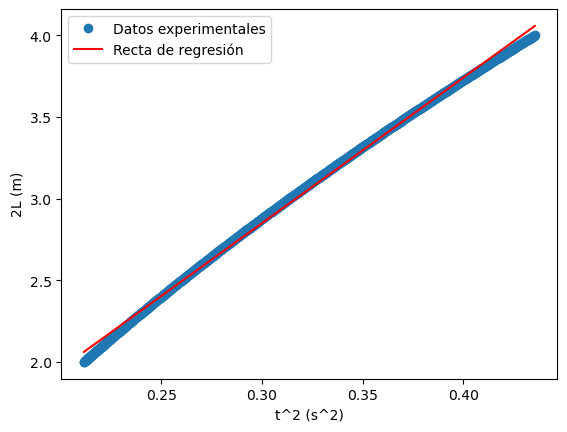

In [108]:

plt.plot(t_cuadrado, dos_L, 'o', label='Datos experimentales')
plt.plot(t_cuadrado, slope*np.array(t_cuadrado) + intercept, 'r', label='Recta de regresión')
plt.xlabel('t^2 (s^2)')
plt.ylabel('2L (m)')
plt.legend()
plt.show()


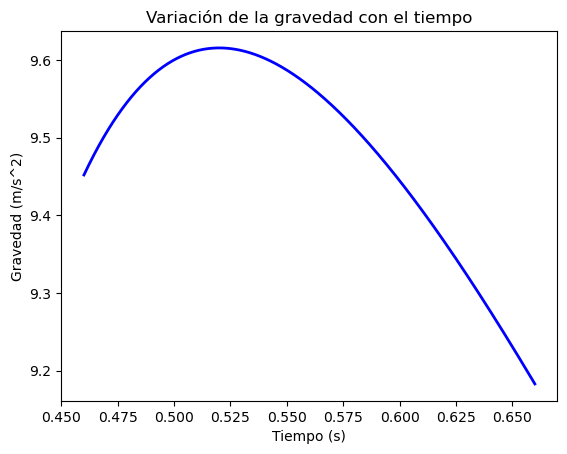

In [113]:
df = pd.read_csv('datos_interpolados.csv')
fig, ax = plt.subplots()

ax.plot(df['t'], df['g'], color='blue', linewidth=2)

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Gravedad (m/s^2)')
ax.set_title('Variación de la gravedad con el tiempo')


plt.savefig('grafico_gravedad_tiempo.png', dpi=300)
